# Predicting House Sale Price
**Kaggle housing data**

### 1. Setting up the environment and data upload

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\PBANE\\OneDrive - Monsanto\\Migrated from My PC\\Documents\\DataScienceAnalytics\\Python\\PythonProjects\\ML_Kaggle\\House_Price'

In [3]:
# Basic imports
import numpy as np
import pandas as pd

In [4]:
# setting up the visualization basics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
# Ignore warning messages
import warnings
warnings.filterwarnings(action= 'ignore')

### 2. Data upload and initial exploration

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [7]:
housingTrain = pd.read_csv("train.csv")
housingTest= pd.read_csv("test.csv")

In [8]:
trainData = housingTrain.copy()
testData = housingTest.copy()

In [9]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
testData.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [11]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We will remove the 'Id' column as this is just an identifyer seral number for each observations and will impact predictions if it goes into the model.

In [12]:
trainData = trainData.drop('Id', axis= 1)
testData = testData.drop('Id', axis= 1)

**Quick exploration with the dependent variable ('SalePrice')**

Text(0.5, 1.0, "Distributon of 'SalePrice'")

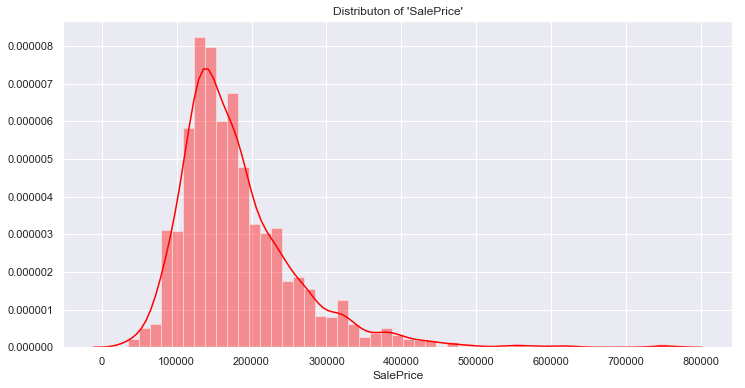

In [13]:
plt.figure(figsize= (12, 6))
sns.distplot(trainData['SalePrice'], color= 'red')
plt.title("Distributon of 'SalePrice'")

In [14]:
trainData['log_SalePrice']= np.log(trainData['SalePrice'])

Text(0.5, 1.0, "Distributon of log of 'SalePrice'")

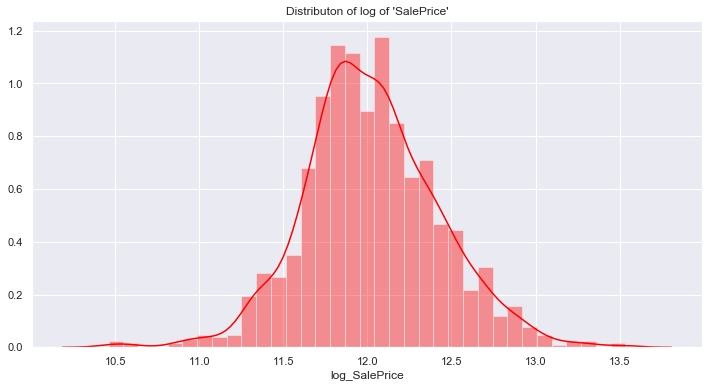

In [15]:
plt.figure(figsize= (12, 6))
sns.distplot(trainData['log_SalePrice'], color= 'red')
plt.title("Distributon of log of 'SalePrice'")

In [16]:
trainData= trainData.drop(['SalePrice'], axis= 1)

### 3. Adding new features

In [16]:
trainData['PoolCat']= pd.cut(trainData['PoolArea'], [0 , 0.1, 500, 1000], include_lowest= True, labels= ['NoPool', 'Upto500', 'GreaterThan500'])
testData['PoolCat']= pd.cut(testData['PoolArea'], [0 , 0.1, 500, 1000], include_lowest= True, labels= ['NoPool', 'Upto500', 'GreaterThan500'])

In [17]:
trainData= trainData.drop(['PoolArea'], axis= 1)
testData= testData.drop(['PoolArea'], axis= 1)

In [18]:
trainData['TotalSF']= trainData['TotalBsmtSF'] + trainData['1stFlrSF'] + trainData['2ndFlrSF']
testData['TotalSF']= testData['TotalBsmtSF'] + testData['1stFlrSF'] + testData['2ndFlrSF']

In [19]:
trainData['TotalPorchSF']= trainData['OpenPorchSF'] + trainData['EnclosedPorch'] + trainData['3SsnPorch'] + trainData['ScreenPorch']
testData['TotalPorchSF']= testData['OpenPorchSF'] + testData['EnclosedPorch'] + testData['3SsnPorch'] + testData['ScreenPorch']

In [20]:
trainData['RemodYrHapened']= trainData['YearRemodAdd'] - trainData['YearBuilt']
testData['RemodYrHapened']= testData['YearRemodAdd'] - testData['YearBuilt']

In [21]:
trainData= trainData.drop(['YearRemodAdd'], axis= 1)
testData= testData.drop(['YearRemodAdd'], axis= 1)

**MSSubClass has several labels which is not truly ordinal in nature. We will convert this as categorical variable.**

In [22]:
dict= {20: '1_Story_New',
      30: '1_Story_Old',
      40: '1_Story_Finished',
      45: '1.5_Story_Unfinished',
      50: '1.5_Story_Finished',
      60: '2_Story_New',
      70: '2_Story_Old',
      75: '2.5_Story',
      80: 'Split_Multi',
      85: 'Split_Foyer',
      90: 'Duplex',
      120: '1_Story_PUD_New',
      150: '1.5_Story_PUD',
       160: '2_Story_PUD_New',
      180: 'Multilevel_PUD',
      190: 'Fam_Coversion'}

In [23]:
trainData['MSSubClass']= trainData['MSSubClass'].map(dict)
testData['MSSubClass']= testData['MSSubClass'].map(dict)

In [24]:
trainData.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_SalePrice,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
0,2_Story_New,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694,NoPool,2566,61,0
1,1_Story_New,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011,NoPool,2524,0,0
2,2_Story_New,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167,NoPool,2706,42,1
3,2_Story_Old,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398,NoPool,2473,307,55


### 4. Correcting feature classes

**Some variable are categorical however they are represented as numerical. We will change them.**

In [25]:
# Function to convert numerical variables to str variables
def num_to_str(df, cols):
    for c in cols:
        df[c]= df[c].astype('str')

In [26]:
num_to_str(trainData, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt'])

In [27]:
trainData.loc[:, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
YearBuilt      1460 non-null object
YrSold         1460 non-null object
MoSold         1460 non-null object
GarageYrBlt    1460 non-null object
dtypes: object(4)
memory usage: 45.7+ KB


In [28]:
num_to_str(testData, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt'])

In [29]:
testData.loc[:, ['YearBuilt', 'YrSold', 'MoSold', 'GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 4 columns):
YearBuilt      1459 non-null object
YrSold         1459 non-null object
MoSold         1459 non-null object
GarageYrBlt    1459 non-null object
dtypes: object(4)
memory usage: 45.7+ KB


### 5. Missing value correction

In [32]:
def missingCount(df):
    ''' Display missing data count and percentage '''
    missing= pd.DataFrame(df.isnull().sum()).reset_index()
    missing.columns= ['variable', 'countMissing']
    missing['pctMissing']= round(missing['countMissing']/len(df), 3)
    missing= missing.loc[missing['countMissing'] > 0].sort_values('pctMissing', ascending = False)
    return missing

In [33]:
missingCount(trainData)

,variable,countMissing,pctMissing
65,PoolQC,1453,0.995
67,MiscFeature,1406,0.963
5,Alley,1369,0.938
66,Fence,1179,0.808
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
53,GarageType,81,0.055
55,GarageFinish,81,0.055
57,GarageQual,81,0.055
58,GarageCond,81,0.055


From the data descriptor we can see that for PoolQC, MiscFeature, Alley, Fence and FireplaceQu the mising data is actually a seperate class 'not available' or 'not present'. Howeverin case of PoolQC, MiscFeature and Alley more than 90% observation are from this class. This will greately reduce prediction power of these variables and we may consider to drop them. 

Lets create a function to replace all NaNs with 'No' in those columns.

In [34]:
def fillingNull(df, columns, string = 'No'):
    '''Fill missing data with a string '''
    for c in columns:
        df[c].fillna(string, inplace= True)

In [35]:
fillingNull(trainData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [36]:
fillingNull(testData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [37]:
missingCount(trainData)

,variable,countMissing,pctMissing
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
53,GarageType,81,0.055
55,GarageFinish,81,0.055
57,GarageQual,81,0.055
58,GarageCond,81,0.055
30,BsmtExposure,38,0.026
33,BsmtFinType2,38,0.026
28,BsmtQual,37,0.025
29,BsmtCond,37,0.025


Now, we can see four Garage feature are all aving 81 missing observations and all are basically having no garage. We shall replace this with 'No'

In [38]:
fillingNull(trainData, ['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish'], 'No')
fillingNull(testData, ['GarageType', 'GarageYrBlt','GarageQual', 'GarageCond', 'GarageFinish'], 'No')

In [39]:
missingCount(trainData)

,variable,countMissing,pctMissing
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
30,BsmtExposure,38,0.026
33,BsmtFinType2,38,0.026
28,BsmtQual,37,0.025
29,BsmtCond,37,0.025
31,BsmtFinType1,37,0.025
23,MasVnrType,8,0.005
24,MasVnrArea,8,0.005
39,Electrical,1,0.001


In [40]:
fillingNull(trainData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')
fillingNull(testData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')

In [41]:
missingCount(trainData)

,variable,countMissing,pctMissing
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
24,MasVnrArea,8,0.005


In [42]:
fillingNull(trainData, ['FireplaceQu'], 'No')
fillingNull(testData, ['FireplaceQu'], 'No')

In [43]:
missingCount(trainData)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
24,MasVnrArea,8,0.005


In [44]:
missingCount(testData)

,variable,countMissing,pctMissing
2,LotFrontage,227,0.156
24,MasVnrArea,15,0.010
1,MSZoning,4,0.003
8,Utilities,2,0.001
21,Exterior1st,1,0.001
22,Exterior2nd,1,0.001
32,BsmtFinSF1,1,0.001
34,BsmtFinSF2,1,0.001
35,BsmtUnfSF,1,0.001
42,BsmtFullBath,2,0.001


### 5. Missing value correction

In [32]:
def missingCount(df):
    ''' Display missing data count and percentage '''
    missing= pd.DataFrame(df.isnull().sum()).reset_index()
    missing.columns= ['variable', 'countMissing']
    missing['pctMissing']= round(missing['countMissing']/len(df), 3)
    missing= missing.loc[missing['countMissing'] > 0].sort_values('pctMissing', ascending = False)
    return missing

In [33]:
missingCount(trainData)

,variable,countMissing,pctMissing
65,PoolQC,1453,0.995
67,MiscFeature,1406,0.963
5,Alley,1369,0.938
66,Fence,1179,0.808
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
53,GarageType,81,0.055
55,GarageFinish,81,0.055
57,GarageQual,81,0.055
58,GarageCond,81,0.055


From the data descriptor we can see that for PoolQC, MiscFeature, Alley, Fence and FireplaceQu the mising data is actually a seperate class 'not available' or 'not present'. Howeverin case of PoolQC, MiscFeature and Alley more than 90% observation are from this class. This will greately reduce prediction power of these variables and we may consider to drop them. 

Lets create a function to replace all NaNs with 'No' in those columns.

In [34]:
def fillingNull(df, columns, string = 'No'):
    '''Fill missing data with a string '''
    for c in columns:
        df[c].fillna(string, inplace= True)

In [35]:
fillingNull(trainData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [36]:
fillingNull(testData, ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 'No')

In [37]:
missingCount(trainData)

,variable,countMissing,pctMissing
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
53,GarageType,81,0.055
55,GarageFinish,81,0.055
57,GarageQual,81,0.055
58,GarageCond,81,0.055
30,BsmtExposure,38,0.026
33,BsmtFinType2,38,0.026
28,BsmtQual,37,0.025
29,BsmtCond,37,0.025


Now, we can see four Garage feature are all aving 81 missing observations and all are basically having no garage. We shall replace this with 'No'

In [38]:
fillingNull(trainData, ['GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'GarageFinish'], 'No')
fillingNull(testData, ['GarageType', 'GarageYrBlt','GarageQual', 'GarageCond', 'GarageFinish'], 'No')

In [39]:
missingCount(trainData)

,variable,countMissing,pctMissing
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
30,BsmtExposure,38,0.026
33,BsmtFinType2,38,0.026
28,BsmtQual,37,0.025
29,BsmtCond,37,0.025
31,BsmtFinType1,37,0.025
23,MasVnrType,8,0.005
24,MasVnrArea,8,0.005
39,Electrical,1,0.001


In [40]:
fillingNull(trainData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')
fillingNull(testData, ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical'], 'No')

In [41]:
missingCount(trainData)

,variable,countMissing,pctMissing
52,FireplaceQu,690,0.473
2,LotFrontage,259,0.177
24,MasVnrArea,8,0.005


In [42]:
fillingNull(trainData, ['FireplaceQu'], 'No')
fillingNull(testData, ['FireplaceQu'], 'No')

In [43]:
missingCount(trainData)

,variable,countMissing,pctMissing
2,LotFrontage,259,0.177
24,MasVnrArea,8,0.005


In [44]:
missingCount(testData)

,variable,countMissing,pctMissing
2,LotFrontage,227,0.156
24,MasVnrArea,15,0.010
1,MSZoning,4,0.003
8,Utilities,2,0.001
21,Exterior1st,1,0.001
22,Exterior2nd,1,0.001
32,BsmtFinSF1,1,0.001
34,BsmtFinSF2,1,0.001
35,BsmtUnfSF,1,0.001
42,BsmtFullBath,2,0.001


### 6. Correlation stdy among numerical features

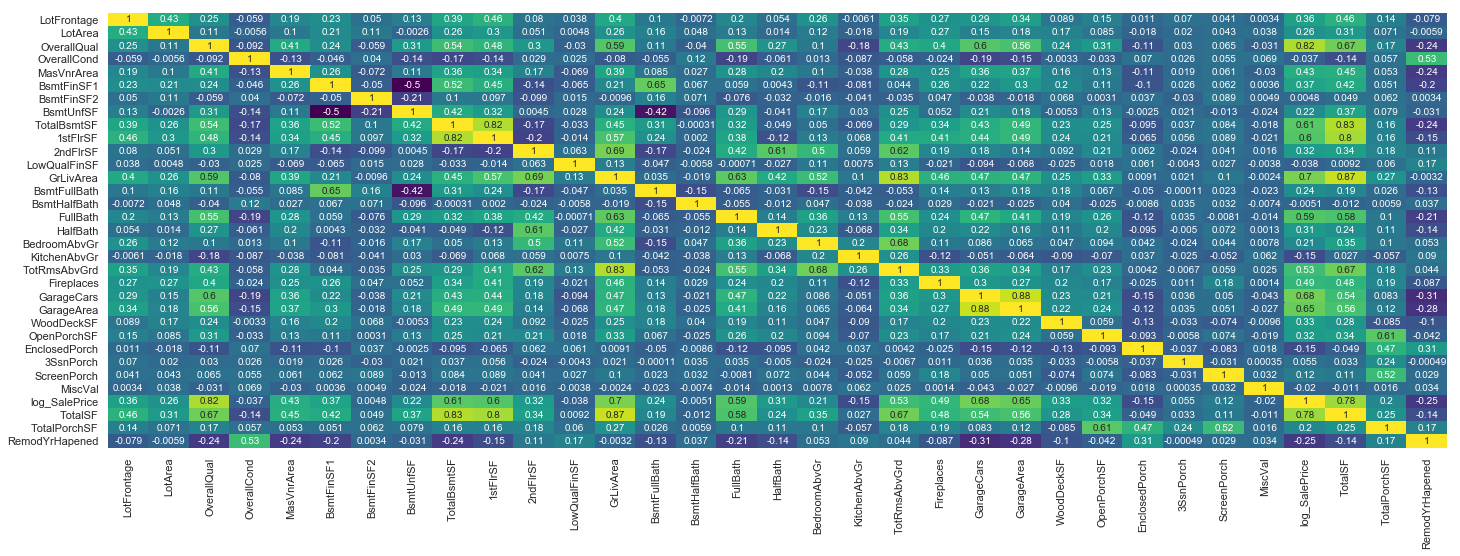

In [30]:
plt.figure(figsize= (24, 8))
sns.heatmap(trainData.corr(), cmap= 'viridis', annot= True, cbar= False)

From the heat map we can see TotalSF exhibited high association with TotalBsmtSF, 1stFlrSF and GrLivAra. After examining correlation with our dependen variable we will keep TotalSF and remove rest 3. 
GarageCars has high colinearity (0.88) with GarageArea. We will remove GarageArea.

In [31]:
trainData= trainData.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], axis= 1)
testData= testData.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], axis= 1)

### Missing value imputation train and test set as a whole and using Simpleimputer and no Pipeline

In [45]:
X= trainData.drop(['log_SalePrice'], axis= 1)

In [46]:
y= trainData['log_SalePrice'].copy()

In [47]:
X_rowsWithNA= X[X.isnull().any(axis=1)]
X_rowsWithNA

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
7,2_Story_New,RL,NaN,10382,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,GasA,Ex,Y,SBrkr,983,0,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,484,TA,TA,Y,235,204,228,0,0,No,No,Shed,350,11,2009,WD,Normal,NoPool,3197,432,0
12,1_Story_New,RL,NaN,12968,Pave,No,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,GasA,TA,Y,SBrkr,0,0,1,0,1,0,2,1,TA,4,Typ,0,No,Detchd,1962.0,Unf,352,TA,TA,Y,140,0,0,0,176,No,No,No,0,9,2008,WD,Normal,NoPool,1824,176,0
14,1_Story_New,RL,NaN,10920,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,GasA,TA,Y,SBrkr,0,0,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,352,TA,TA,Y,0,213,176,0,0,No,GdWo,No,0,5,2008,WD,Normal,NoPool,2506,389,0
16,1_Story_New,RL,NaN,11241,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,GasA,Ex,Y,SBrkr,0,0,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,480,TA,TA,Y,0,0,0,0,0,No,No,Shed,700,3,2010,WD,Normal,NoPool,2008,0,0
24,1_Story_New,RL,NaN,8246,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,GasA,Ex,Y,SBrkr,0,0,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,270,TA,TA,Y,406,90,0,0,0,No,MnPrv,No,0,5,2010,WD,Normal,NoPool,2120,90,33
31,1_Story_New,RL,NaN,8544,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,GasA,Gd,Y,SBrkr,0,0,0,0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1966.0,Unf,271,TA,TA,Y,0,65,0,0,0,No,MnPrv,No,0,6,2008,WD,Normal,NoPool,2456,65,40
42,Split_Foyer,RL,NaN,9180,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,GasA,Gd,Y,SBrkr,0,0,1,0,1,0,2,1,Gd,5,Typ,0,No,Attchd,1983.0,RFn,504,TA,Gd,Y,240,0,0,0,0,No,MnPrv,No,0,12,2007,WD,Normal,NoPool,1724,0,0
43,1_Story_New,RL,NaN,9200,Pave,No,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280,BLQ,491,167,GasA,TA,Y,SBrkr,0,0,1,0,1,0,3,1,TA,5,Typ,0,No,Detchd,1977.0,Unf,308,TA,TA,Y,145,0,0,0,0,No,MnPrv,No,0,7,2008,WD,Normal,NoPool,1876,0,5
50,2_Story_New,RL,NaN,13869,Pave,No,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,GasA,Gd,Y,SBrkr,676,0,0,1,2,0,3,1,TA,6,Typ,0,No,Attchd,1997.0,Fin,388,TA,TA,Y,0,75,0,0,0,No,No,No,0,7,2007,WD,Normal,NoPool,2264,75,0
64,2_Story_New,RL,NaN,9375,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,GasA,Ex,Y,SBrkr,977,0,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,1998.0,RFn,645,TA,TA,Y,576,36,0,0,0,No,GdPrv,No,0,2,2009,WD,Normal,NoPool,3091,36,1


In [48]:
X_num= X.select_dtypes(include= 'number')
X_cat= X.select_dtypes(exclude= 'number')

In [49]:
from sklearn.impute import SimpleImputer
imputerNum= SimpleImputer(strategy= 'median')
imputerCat= SimpleImputer(strategy= 'most_frequent')

In [50]:
imputerNum.fit(X_num)
imputerCat.fit(X_cat)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [51]:
imputerCat.statistics_

array(['1_Story_New', 'RL', 'Pave', 'No', 'Reg', 'Lvl', 'AllPub',
       'Inside', 'Gtl', 'NAmes', 'Norm', 'Norm', '1Fam', '1Story', '2006',
       'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'None', 'TA', 'TA',
       'PConc', 'TA', 'TA', 'No', 'Unf', 'Unf', 'GasA', 'Ex', 'Y',
       'SBrkr', 'TA', 'Typ', 'No', 'Attchd', 'nan', 'Unf', 'TA', 'TA',
       'Y', 'No', 'No', 'No', '6', '2009', 'WD', 'Normal', 'NoPool'],
      dtype=object)

In [52]:
imputerNum.statistics_

array([6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00, 0.0000e+00,
       3.8350e+02, 0.0000e+00, 4.7750e+02, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
       1.0000e+00, 6.0000e+00, 1.0000e+00, 4.8000e+02, 0.0000e+00,
       2.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       2.4740e+03, 4.8000e+01, 0.0000e+00])

In [53]:
X_num_trans= imputerNum.transform(X_num)
X_num_trans= pd.DataFrame(X_num_trans, columns= X_num.columns, index= X_num.index)
X_num_trans.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,TotalSF,TotalPorchSF,RemodYrHapened
0,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,854.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,2566.0,61.0,0.0
1,80.0,9600.0,6.0,8.0,0.0,978.0,0.0,284.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,2524.0,0.0,0.0
2,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,866.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,2706.0,42.0,1.0
3,60.0,9550.0,7.0,5.0,0.0,216.0,0.0,540.0,756.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,2473.0,307.0,55.0
4,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,1053.0,0.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,3343.0,84.0,0.0


In [54]:
X_cat_trans= imputerCat.transform(X_cat)
X_cat_trans= pd.DataFrame(X_cat_trans, columns= X_cat.columns, index= X_cat.index)
X_cat_trans.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,PoolCat
0,2_Story_New,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,2003.0,RFn,TA,TA,Y,No,No,No,2,2008,WD,Normal,NoPool
1,1_Story_New,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,No,No,No,5,2007,WD,Normal,NoPool
2,2_Story_New,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,No,No,No,9,2008,WD,Normal,NoPool
3,2_Story_Old,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,No,No,No,2,2006,WD,Abnorml,NoPool
4,2_Story_New,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,No,No,No,12,2008,WD,Normal,NoPool


In [55]:
X_trans= pd.merge(X_cat_trans, X_num_trans, how= 'outer', left_index= True, right_index= True)
X_trans.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,PoolCat,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,TotalSF,TotalPorchSF,RemodYrHapened
0,2_Story_New,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,2003.0,RFn,TA,TA,Y,No,No,No,2,2008,WD,Normal,NoPool,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,854.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,2566.0,61.0,0.0
1,1_Story_New,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976.0,RFn,TA,TA,Y,No,No,No,5,2007,WD,Normal,NoPool,80.0,9600.0,6.0,8.0,0.0,978.0,0.0,284.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,2524.0,0.0,0.0
2,2_Story_New,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001.0,RFn,TA,TA,Y,No,No,No,9,2008,WD,Normal,NoPool,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,866.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,2706.0,42.0,1.0
3,2_Story_Old,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998.0,Unf,TA,TA,Y,No,No,No,2,2006,WD,Abnorml,NoPool,60.0,9550.0,7.0,5.0,0.0,216.0,0.0,540.0,756.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,2473.0,307.0,55.0
4,2_Story_New,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000.0,RFn,TA,TA,Y,No,No,No,12,2008,WD,Normal,NoPool,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,1053.0,0.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,3343.0,84.0,0.0


In [56]:
X_trans.loc[X_rowsWithNA.index.values].isnull().sum()

MSSubClass        0
MSZoning          0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
YearBuilt         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
PoolCat           0
LotFrontage       0


## Learning curve study ##

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [103]:
def plotLearningCurve(model, X, y):
    '''the function will create training and test setsfrom the predictor and lable matrix. It will fit a givel model on supplied data '''
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)
    train_errors, test_errors= [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred= model.predict(X_train[:m])
        y_test_pred= model.predict(X_test)
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
        
    plt.plot(np.sqrt(train_errors), "g-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "r-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
        

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [106]:
from sklearn.linear_model import LinearRegression

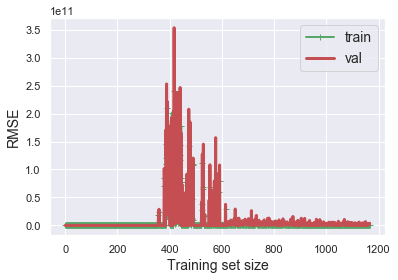

In [108]:
lin_reg = LinearRegression()
plotLearningCurve(lin_reg, X_train_trns, y_train)

## Pipeline to make data ML ready ##

In [84]:
trainData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,log_SalePrice,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
0,2_Story_New,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,854,0,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,No,No,No,0,2,2008,WD,Normal,12.247694,NoPool,2566,61,0
1,1_Story_New,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,No,No,No,0,5,2007,WD,Normal,12.109011,NoPool,2524,0,0
2,2_Story_New,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,No,No,No,0,9,2008,WD,Normal,12.317167,NoPool,2706,42,1
3,2_Story_Old,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,No,No,No,0,2,2006,WD,Abnorml,11.849398,NoPool,2473,307,55
4,2_Story_New,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,No,No,No,0,12,2008,WD,Normal,12.429216,NoPool,3343,84,0


In [85]:
testData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PoolCat,TotalSF,TotalPorchSF,RemodYrHapened
0,1_Story_New,RH,80.0,11622,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,GasA,TA,Y,SBrkr,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961.0,Unf,730.0,TA,TA,Y,140,0,0,0,120,No,MnPrv,No,0,6,2010,WD,Normal,NoPool,1778.0,120,0
1,1_Story_New,RL,81.0,14267,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,GasA,TA,Y,SBrkr,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958.0,Unf,312.0,TA,TA,Y,393,36,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,NoPool,2658.0,36,0
2,2_Story_New,RL,74.0,13830,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,GasA,Gd,Y,SBrkr,701,0,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,482.0,TA,TA,Y,212,34,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,NoPool,2557.0,34,1
3,2_Story_New,RL,78.0,9978,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,GasA,Ex,Y,SBrkr,678,0,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,470.0,TA,TA,Y,360,36,0,0,0,No,No,No,0,6,2010,WD,Normal,NoPool,2530.0,36,0
4,1_Story_PUD_New,RL,43.0,5005,Pave,No,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,GasA,Ex,Y,SBrkr,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992.0,RFn,506.0,TA,TA,Y,0,82,0,0,144,No,No,No,0,1,2010,WD,Normal,NoPool,2560.0,226,0


In [87]:
X_train = trainData.drop('log_SalePrice', axis= 1)

In [88]:
y_train = trainData['log_SalePrice'].copy()

In [89]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [91]:
X_train_num = X_train.select_dtypes(include= [np.number])
X_train_cat = X_train.select_dtypes(exclude= [np.number])

In [94]:
num_attribs= list(X_train_num)
cat_attribs= list(X_train_cat)

In [95]:
num_pipeline= Pipeline([
    ('num_imputer', SimpleImputer(strategy= 'median')),
    ('scaller', StandardScaler()),
])

In [96]:

cat_pipeline= Pipeline([
    ('cat_imputer', SimpleImputer(strategy= 'most_frequent')),
    ('onehot', OneHotEncoder(sparse= False)),
])

In [97]:
fullPipeline= ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [98]:
X_train_trns= fullPipeline.fit_transform(X_train)

In [109]:
pd.DataFrame(X_train_trns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539
0,-0.220875,-0.207142,0.651479,-0.517200,0.514104,0.575425,-0.288653,-0.944591,1.161852,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.087688,-0.001277,-0.248063,-0.555742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.